In [1]:
import numpy as np
from sampler import Sampler, load_from_files
from s_manager import SManager
import hickle, os
import matplotlib.pyplot as plt
import copy
plt.rcParams['figure.figsize'] = [10, 20]

def all_chi2(vis):
    print("Expected chi2", np.mean(vis.chi2["Jee"][0]))
    if vis.is_redundant: print("calculated chi2 by redcal", vis.get_chi2(over_all=True))
    for dof in [ "default", "as_if_redundant", "as_if_non_redundant", "use_nvis" ]:
        for use_noise in [ True, False ]:
            print("calculated chi2 by equation, dof", dof, "use_noise", use_noise, vis.get_chi2_eqn(dof=dof, use_noise=use_noise))


In [2]:
sampler = load_from_files("SAMPLER_DIR")
#sampler = load_from_files("/data/scratch/apw737/catall_nobright/sampled_viscatBC")#
print(sampler.vis_redcal.redundant_groups)
name = os.path.basename("SAMPLER_DIR")


[[2, 11, 19, 32, 37, 41], [3, 12, 20, 27, 33, 38], [0, 9, 24, 30, 35, 42, 44], [6, 15, 23], [10, 18, 36, 40], [4, 13, 28, 34], [1, 25, 31, 43], [14, 22], [7, 16], [17, 39], [5, 29], [21], [8], [26]]


In [3]:
all_chi2(sampler.vis_redcal)
all_chi2(sampler.vis_sampled)

Expected chi2 1.010276
calculated chi2 by redcal 8.411261678564541
chi2 dof default use_noise
calculated chi2 by equation, dof default use_noise True 9.507940753770491
chi2 dof default use_noise
calculated chi2 by equation, dof default use_noise False 9.208908304936575
chi2 dof as_if_redundant use_noise
calculated chi2 by equation, dof as_if_redundant use_noise True 9.507940753770491
chi2 dof as_if_redundant use_noise
calculated chi2 by equation, dof as_if_redundant use_noise False 9.208908304936575
chi2 dof as_if_non_redundant use_noise
calculated chi2 by equation, dof as_if_non_redundant use_noise True 5.705613186094365
chi2 dof as_if_non_redundant use_noise
calculated chi2 by equation, dof as_if_non_redundant use_noise False 5.526167023426567
chi2 dof use_nvis use_noise
calculated chi2 by equation, dof use_nvis use_noise True 4.4379192304962425
chi2 dof use_nvis use_noise
calculated chi2 by equation, dof use_nvis use_noise False 4.2983430709901835
Expected chi2 1.010276
calculated c

In [4]:
redcal_log = abs(sampler.vis_redcal.get_unnormalized_likelihood(over_all=True, unity_N=False, exp=False))
sampled_log = abs(sampler.vis_sampled.get_unnormalized_likelihood(over_all=True, unity_N=False, exp=False))
print("abs Log posterior", redcal_log, ">", sampled_log, "?")
if redcal_log <= sampled_log:
    print("Sampler has not improved the calibration")
else: print("Ok")
redcal_rms = sampler.vis_redcal.get_rms()
sampled_rms = sampler.vis_sampled.get_rms()
print("RMS", redcal_rms, ">", sampled_rms, "?")
if redcal_rms <= sampled_rms:
    print("Sampler has not improved the calibration")
else: print("Ok")
    
if sampler.vis_redcal.is_redundant():
    redcal_chi2 = sampler.vis_redcal.get_chi2(over_all=True)
    sampled_chi2 = sampler.vis_sampled.get_chi2(over_all=True)
    print("Expected chi2", np.mean(sampler.vis_redcal.chi2["Jee"]))
    print("CHI2", redcal_chi2, ">", sampled_chi2, "?")
    if redcal_chi2 <= sampled_chi2:
        print("Sampler has not improved the calibration")
    else: print("Ok")

abs Log posterior 51133.7053737777 > 37214.59780475343 ?
Ok
RMS 0.5333073744324975 > 0.4553164887839154 ?
Ok
Expected chi2 0.9987732
CHI2 8.411261678564541 > 6.117422078512085 ?
Ok


Plot corner
g values: 8, V values: 4


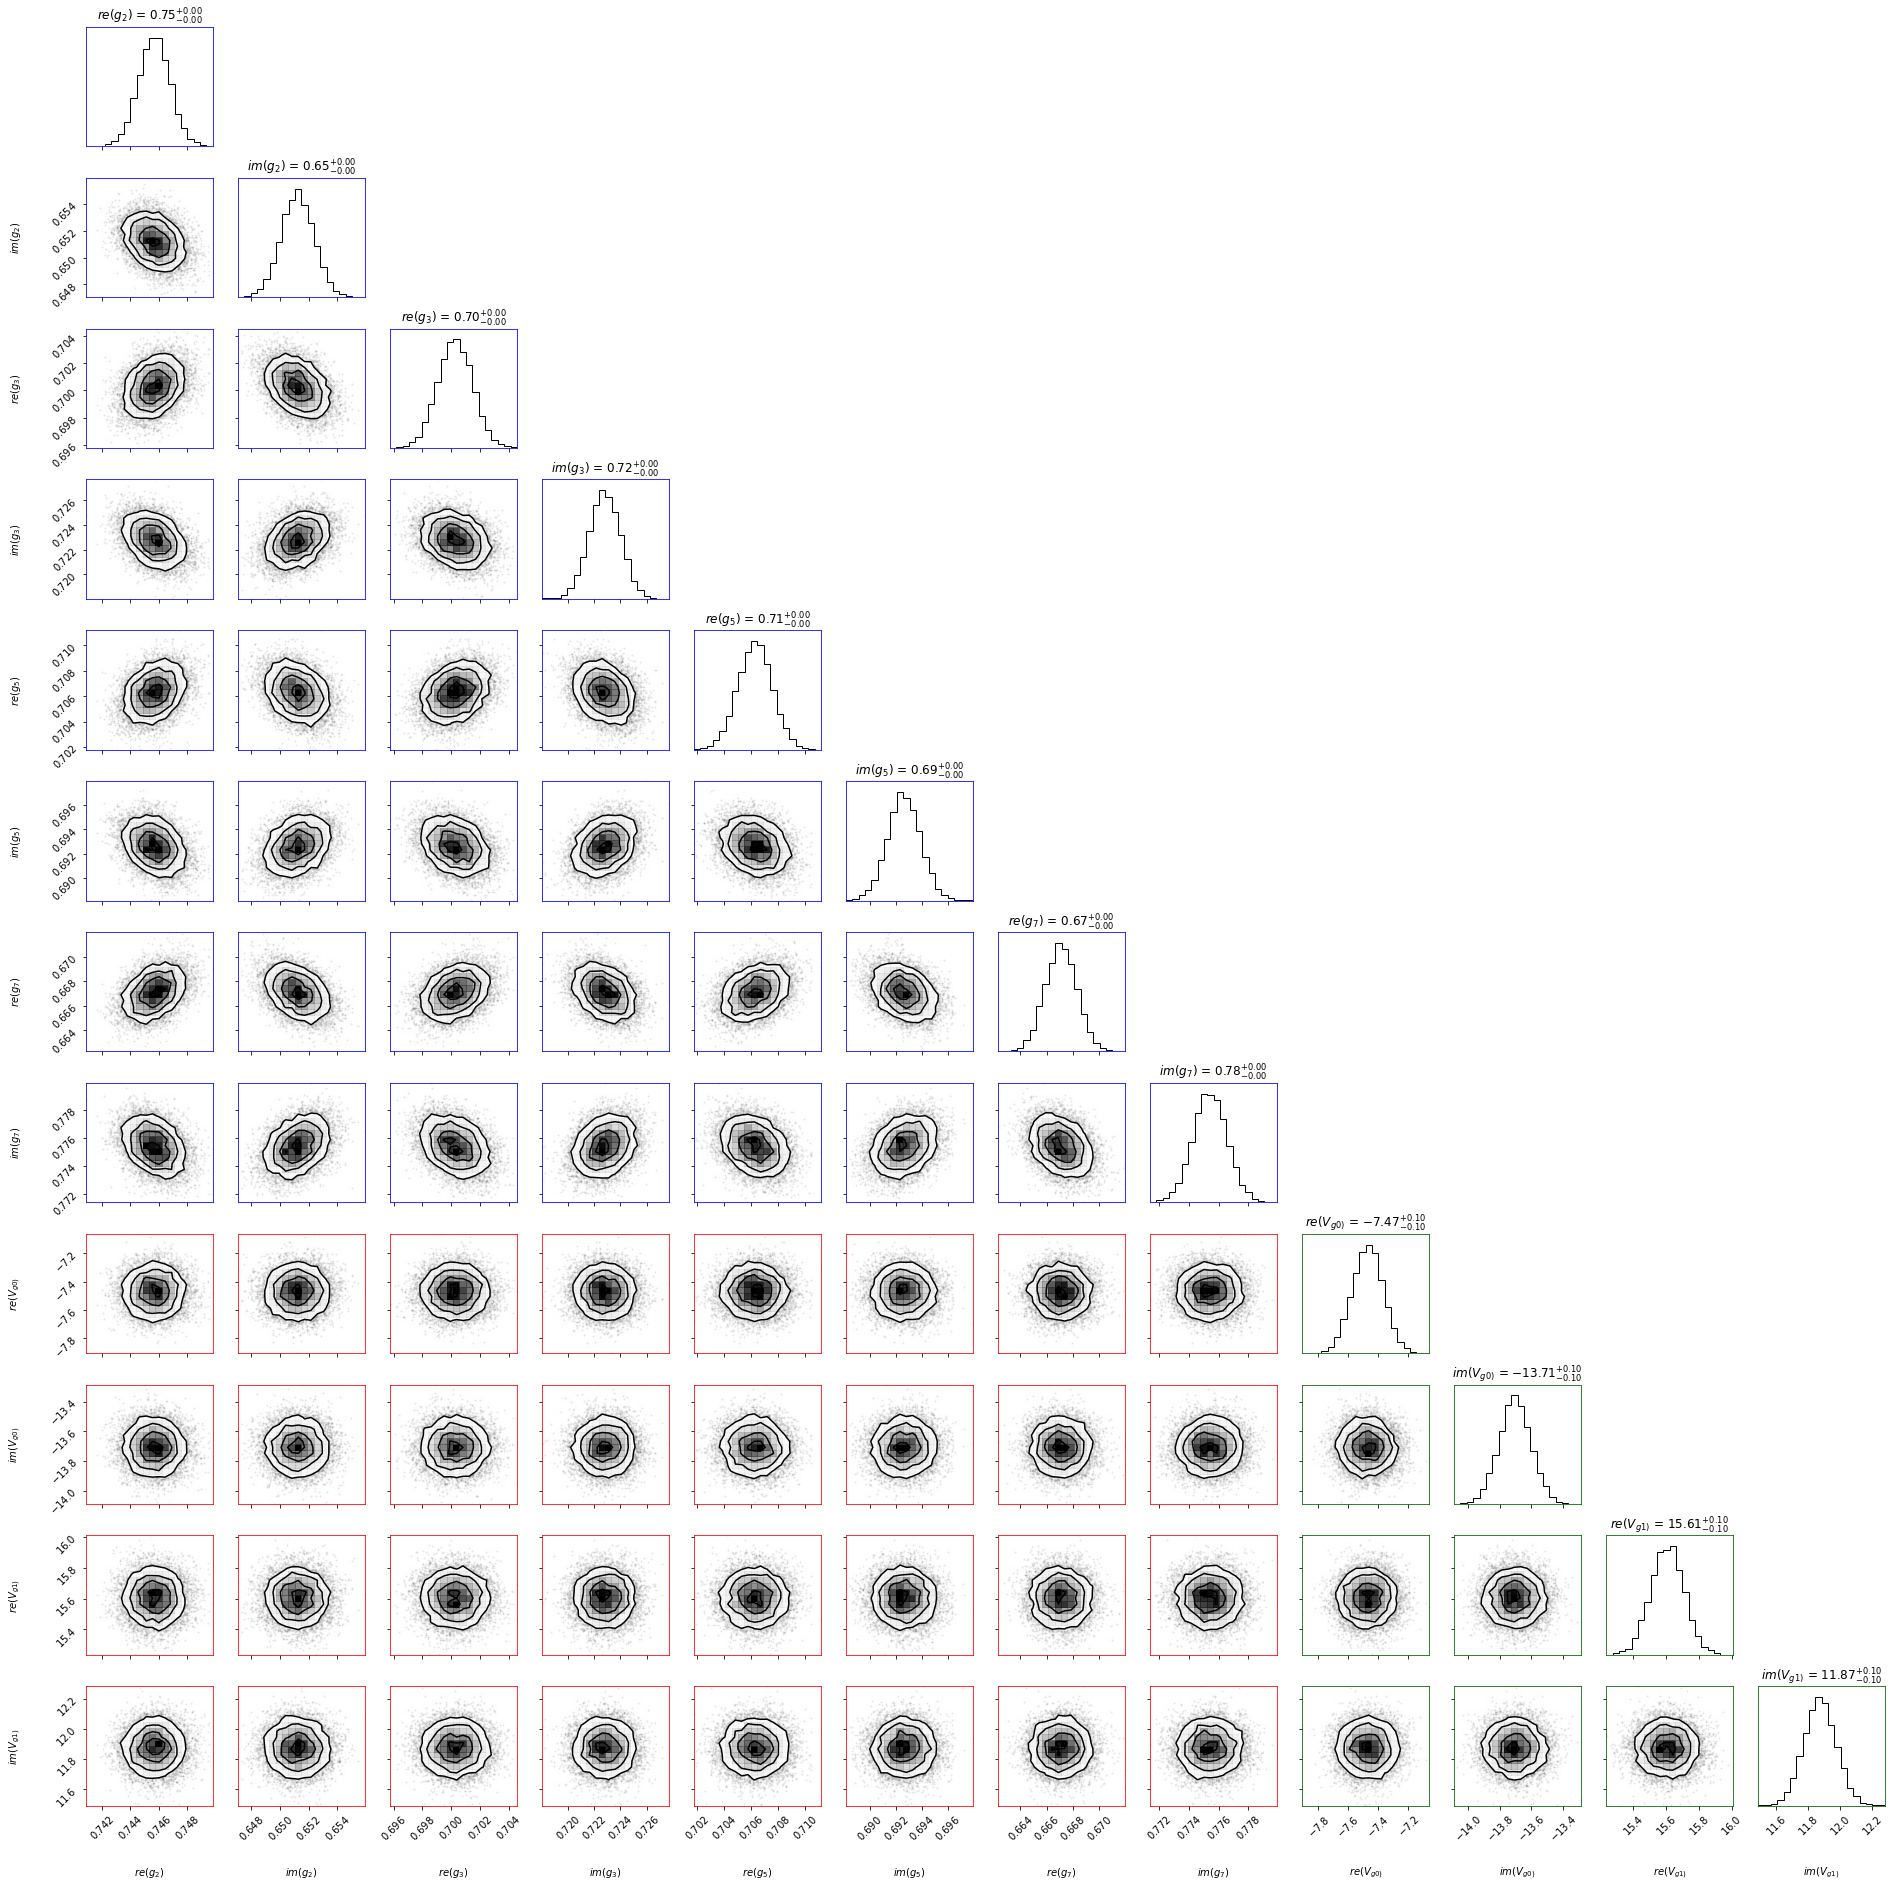

In [5]:
sampler.plot_corner(["g", "V"], time=6, freq=3, baselines=[19, 27], plot_to=name+"_corner1")

Plot corner
g values: 8, V values: 2


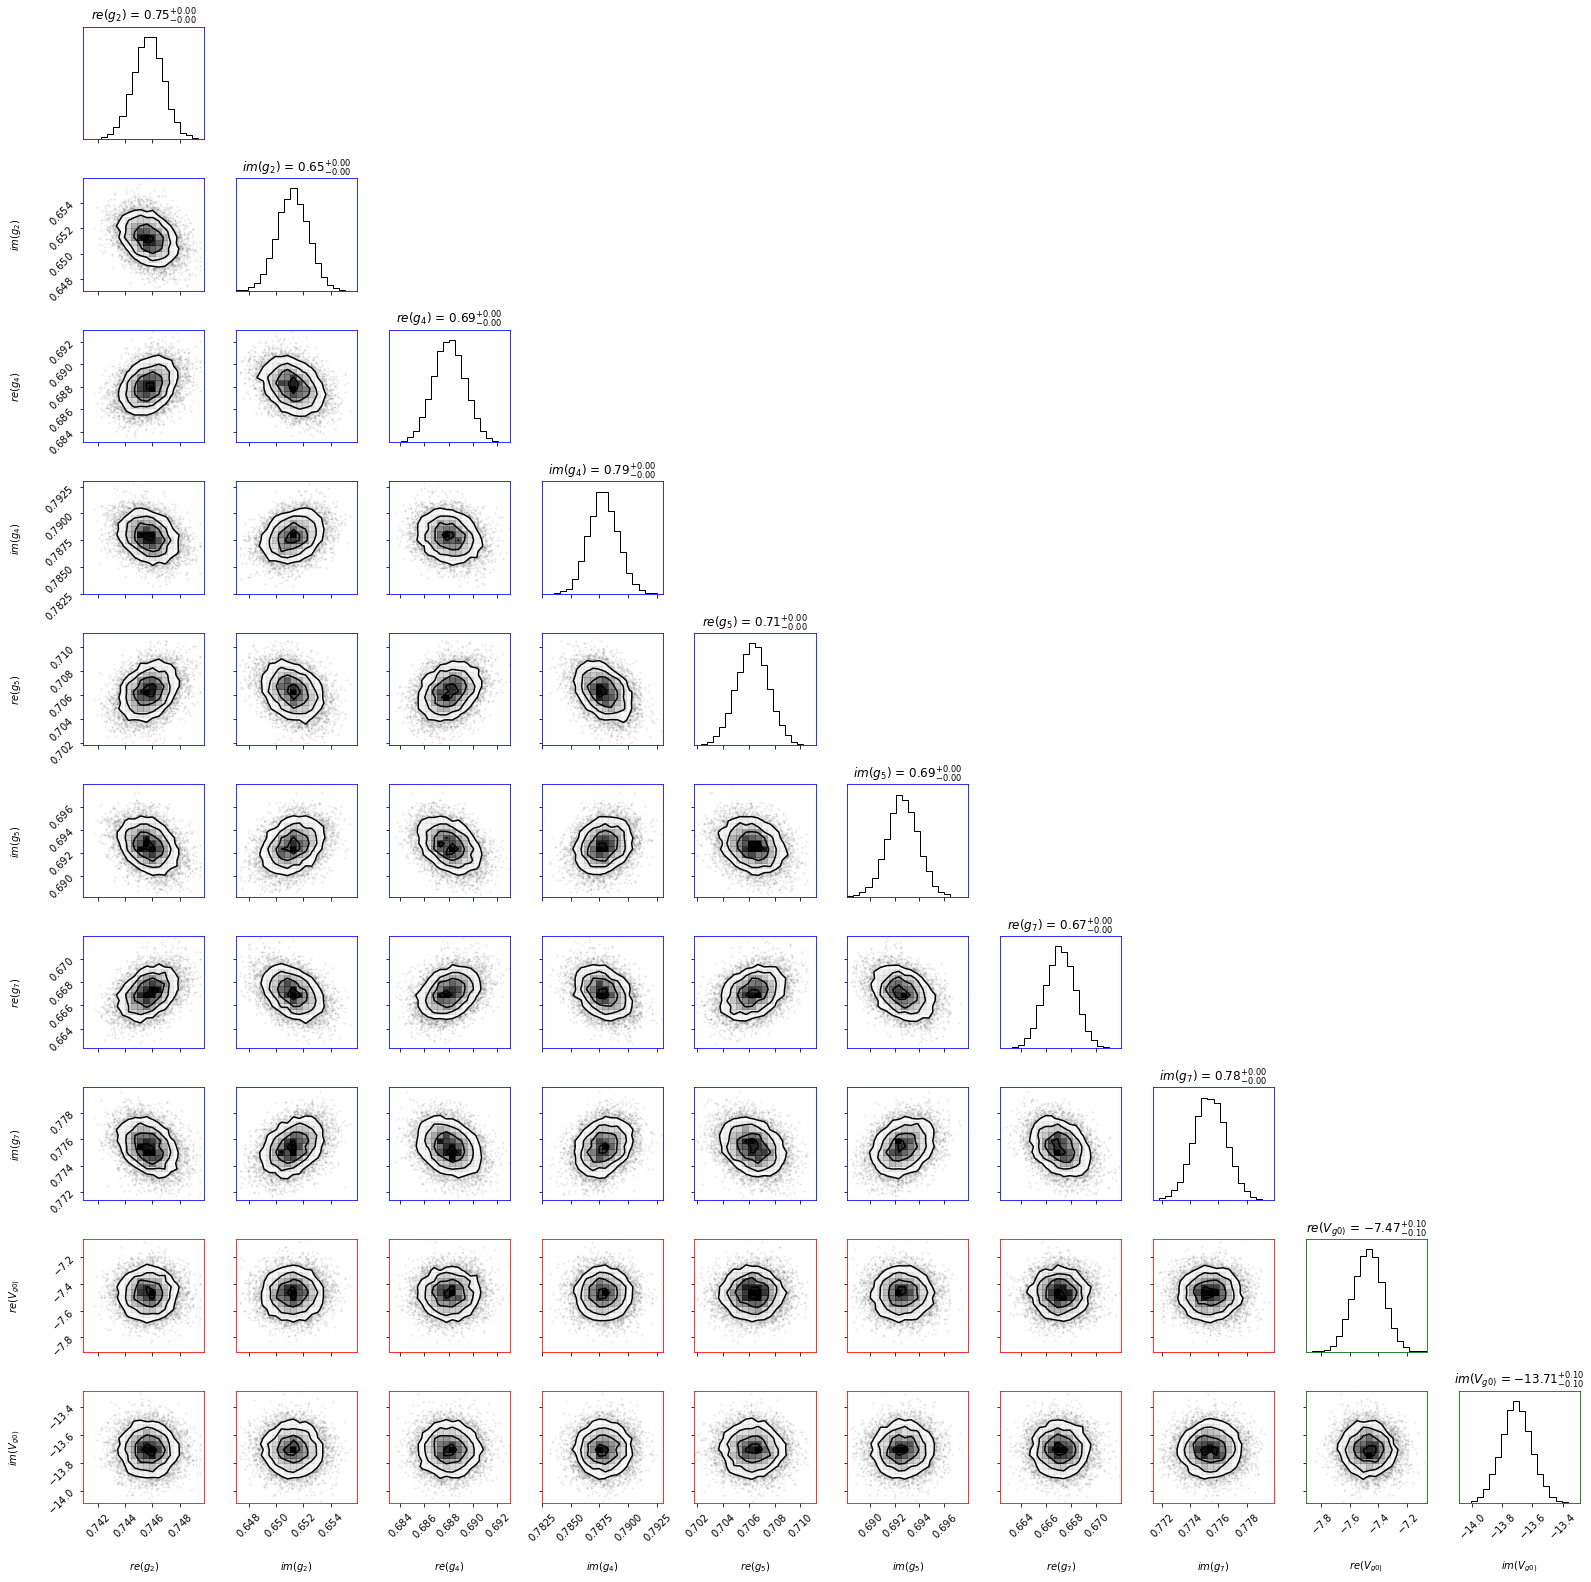

In [6]:
sampler.plot_corner(["g", "V"], time=6, freq=3, baselines=[19, 32], plot_to=name+"_corner2")

Plot corner
x values: 12, V values: 6


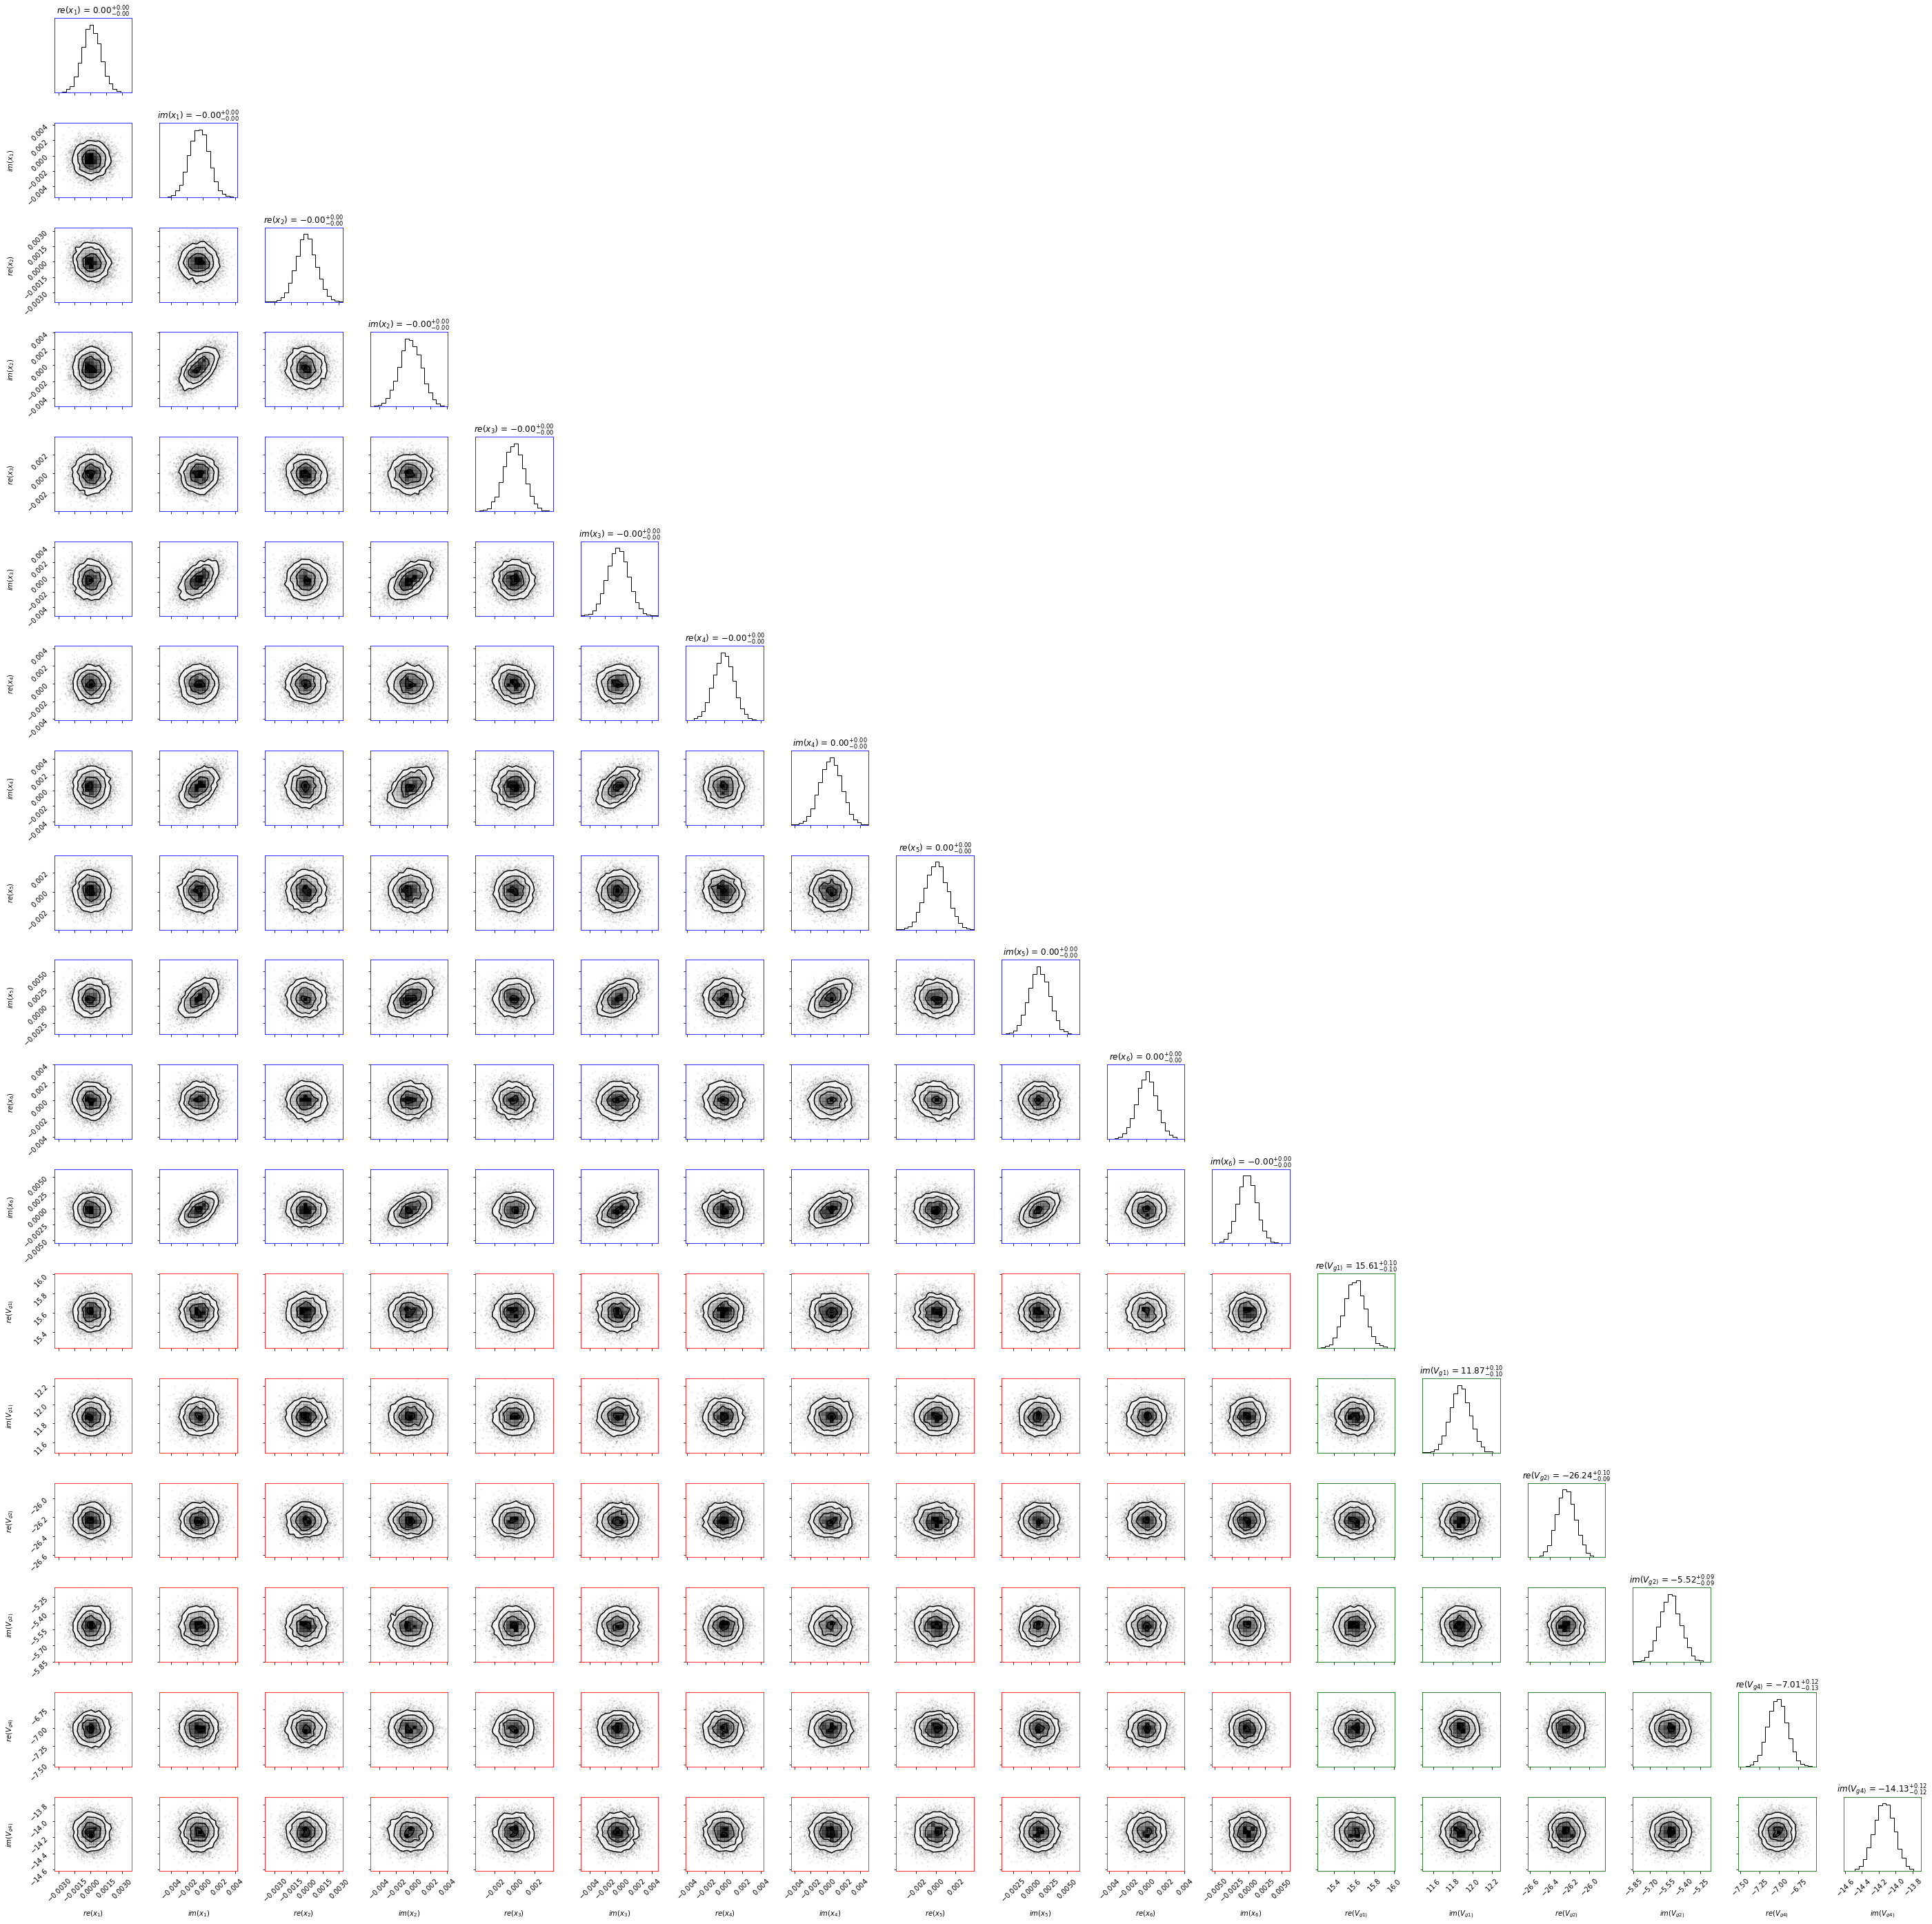

In [7]:
sampler.plot_corner(["x", "V"], time=6, freq=3, baselines=[10, 20, 30])

Plot corner
x values: 7, V values: 6


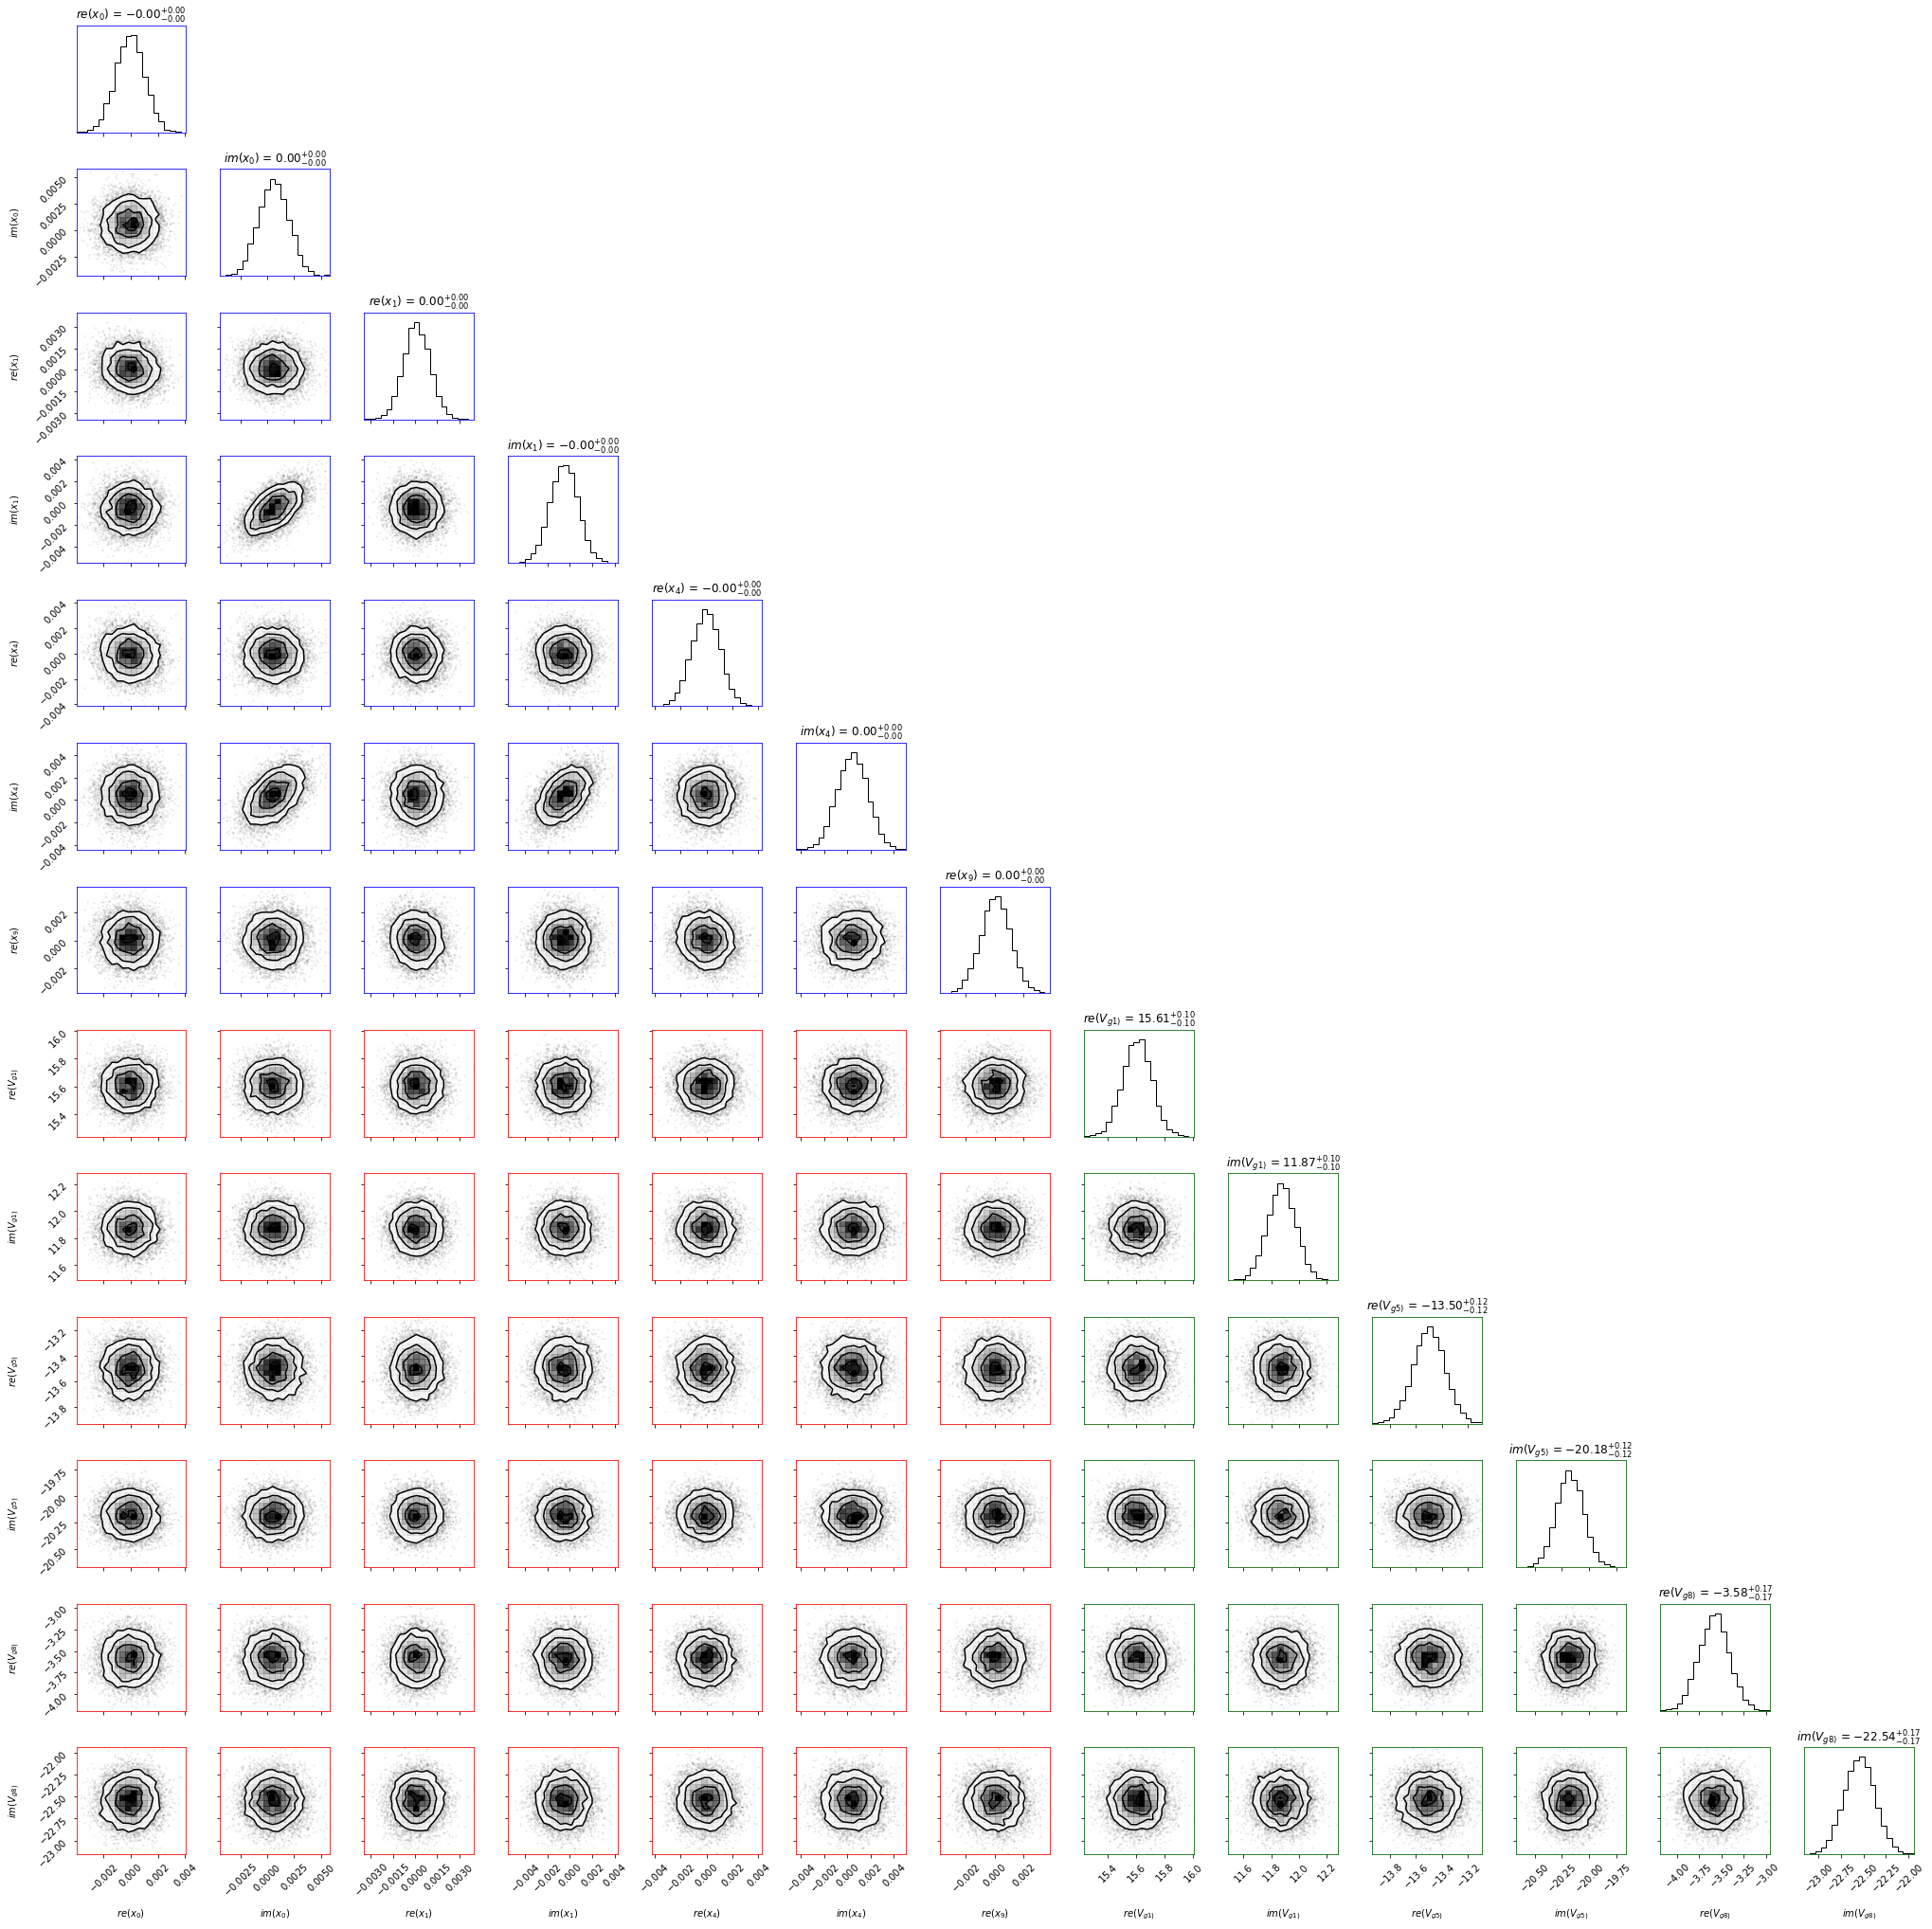

In [8]:
sampler.plot_corner(["x", "V"], time=6, freq=3, baselines=[3, 16, 34])

Plotting correlation matrix
g values: 5120, V values: 7168
Matrix size (12288, 12288)
Mean: -0.000018 Sigma: 0.027687 Skew: 0.921986 Kurtosis: 157.510899
Min: -0.600914 Max: 1.000000
99.9 percentile: 0.313745
99 percentile: 0.124501
95 percentile: 0.026420
90 percentile: 0.016910
80 percentile: 0.010349
70 percentile: 0.006310


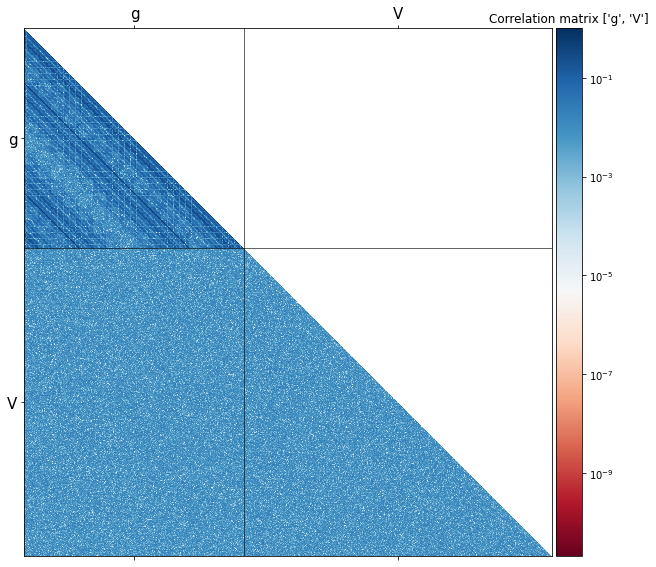

In [9]:
sampler.plot_covcorr(["g", "V"], log=True, plot_to=name+"_corr")

Plotting correlation matrix
x values: 4864, V values: 7168


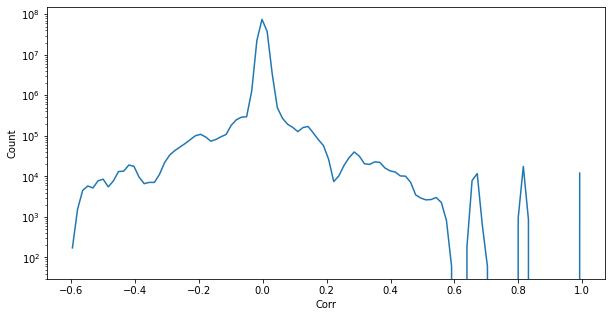

In [10]:
plt.rcParams['figure.figsize'] = [10, 5]
sampler.plot_covcorr(["x", "V"], log=True, hist=True)

Plot marginals


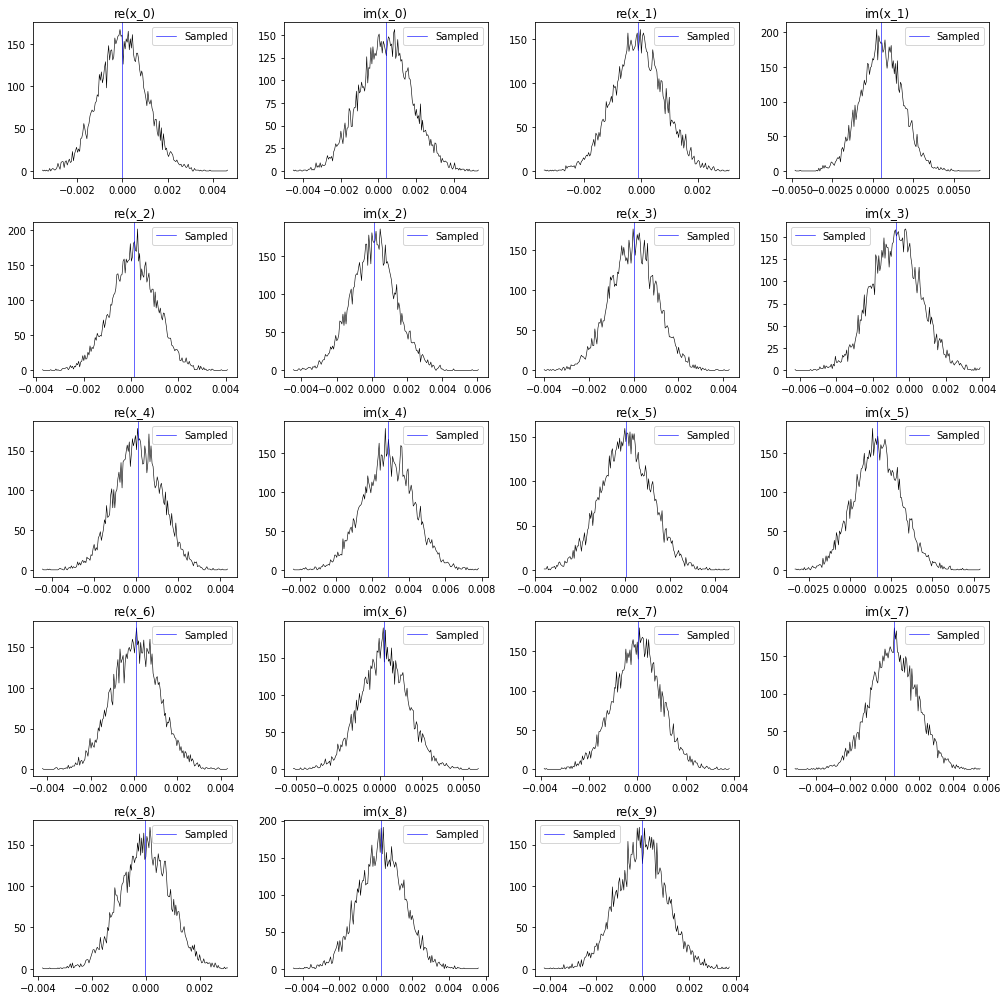

In [11]:
plt.rcParams['figure.figsize'] = [14, 14]
sampler.plot_marginals("x", cols=4, time=0, freq=0, which=["Sampled"])

Plot marginals


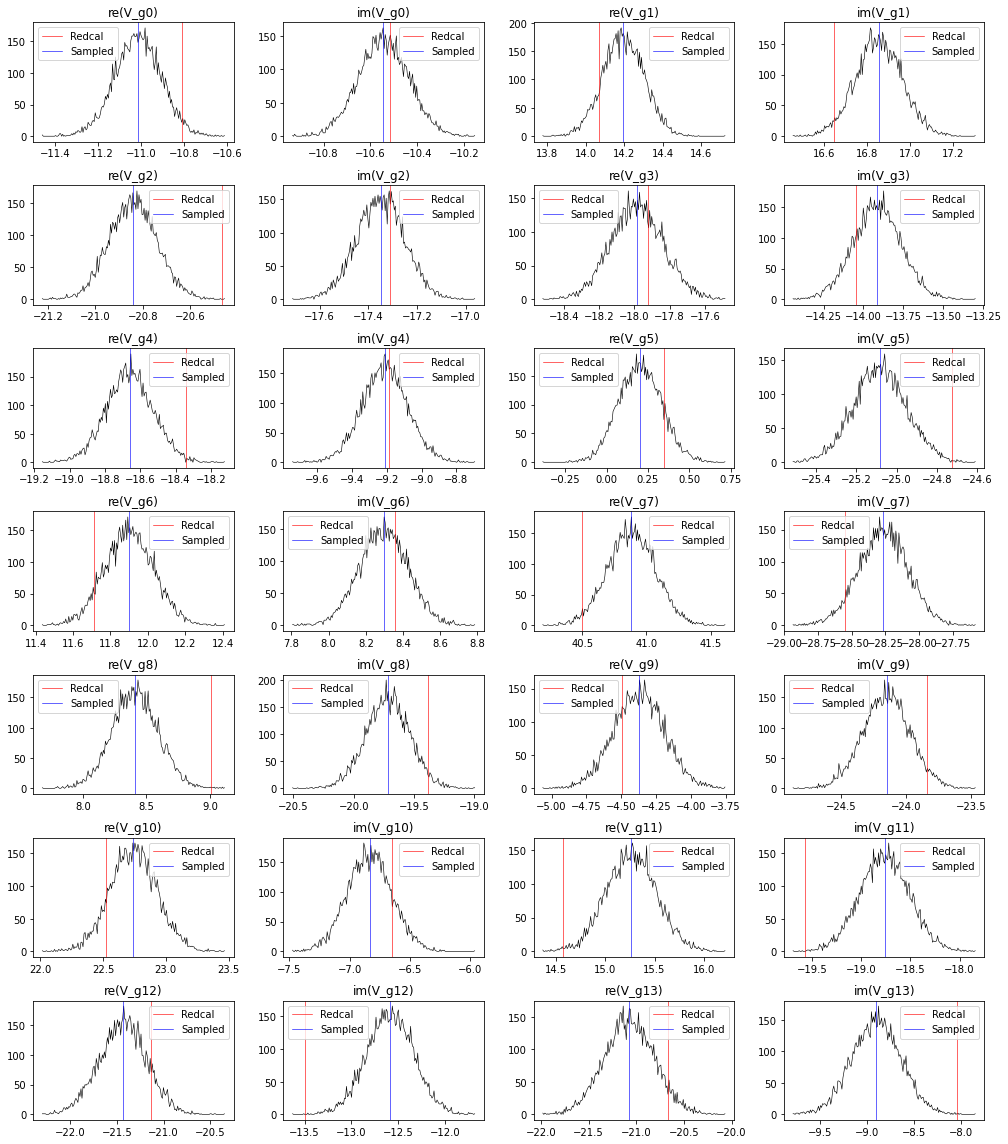

In [12]:
plt.rcParams['figure.figsize'] = [14, 16]
sampler.plot_marginals("V", cols=4, time=0, freq=0, which=["Redcal", "Sampled"])

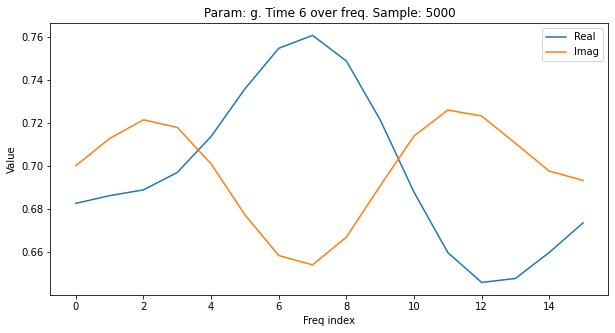

In [13]:
plt.rcParams['figure.figsize'] = [10, 5]
sampler.plot_one_over_time_freq("g", 5000, 6, time=6, plot_to=name+"_g_one_over1")

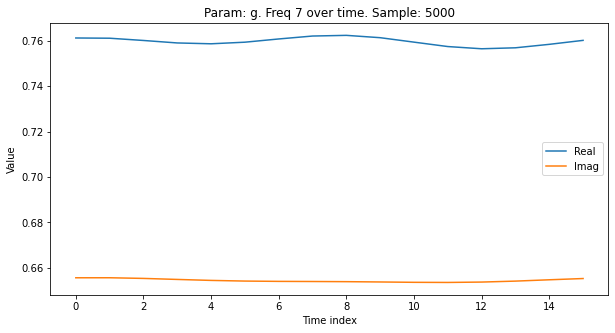

In [14]:
sampler.plot_one_over_time_freq("g", 5000, 6, freq=7, plot_to=name+"_g_one_over2")

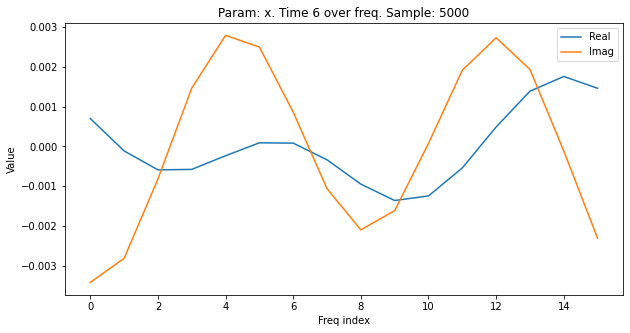

In [15]:
sampler.plot_one_over_time_freq("x", 5000, 6, time=6, plot_to=name+"_x_one_over1")

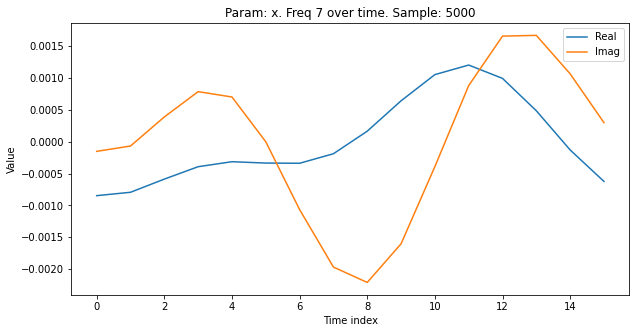

In [16]:
sampler.plot_one_over_time_freq("x", 5000, 6, freq=7, plot_to=name+"_x_one_over2")

Plot gains


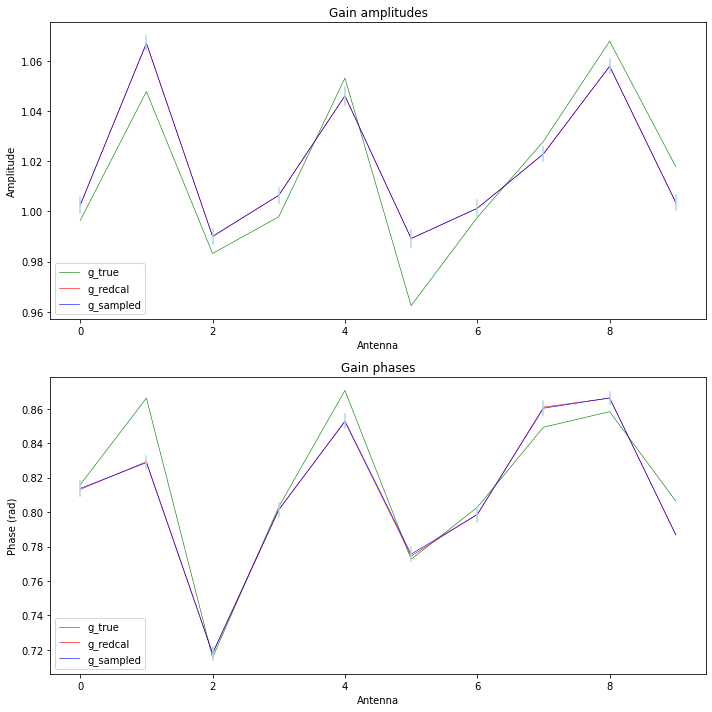

In [17]:
plt.rcParams['figure.figsize'] = [10, 10]
sampler.plot_gains(time=6, freq=3, sigma=3, plot_to=name+"_gains")

In [18]:
#sampler.print_sample_stats("x", time=3, freq=3)

Stats for x samples

  Time  Freq   Parameter      Mean       Variance       Sigma
    0     0    re(x_0)     -0.000024     0.000001     0.001053
    0     0    im(x_0)      0.001785     0.000002     0.001375
    0     0    re(x_1)      0.000001     0.000001     0.000887
    0     0    im(x_1)      0.000867     0.000002     0.001249
    0     0    re(x_2)     -0.000023     0.000001     0.000962
    0     0    im(x_2)      0.000148     0.000002     0.001291
    0     0    re(x_3)     -0.000034     0.000001     0.001041
    0     0    im(x_3)     -0.000020     0.000002     0.001345
    0     0    re(x_4)      0.000058     0.000001     0.001100
    0     0    im(x_4)      0.000346     0.000002     0.001357
    0     0    re(x_5)      0.000028     0.000001     0.001130
    0     0    im(x_5)      0.002165     0.000002     0.001420
    0     0    re(x_6)      0.000120     0.000001     0.001067
    0     0    im(x_6)      0.001345     0.000002     0.001413
    0     0    re(x_7)     -0.00000

In [19]:
#sampler.print_sample_stats("V", time=0, freq=6)

Stats for V samples

  Time  Freq   Parameter      Mean       Variance       Sigma
    0     0    re(V_0)    -10.316414     0.010099     0.100494
    0     0    im(V_0)    -10.578911     0.010221     0.101097
    0     0    re(V_1)     14.528736     0.010078     0.100390
    0     0    im(V_1)     16.402898     0.010153     0.100760
    0     0    re(V_2)    -20.054374     0.008362     0.091442
    0     0    im(V_2)    -17.563989     0.008324     0.091233
    0     0    re(V_3)    -18.381300     0.020000     0.141421
    0     0    im(V_3)    -14.882018     0.019946     0.141229
    0     0    re(V_4)    -18.431421     0.014963     0.122323
    0     0    im(V_4)     -9.478126     0.015659     0.125138
    0     0    re(V_5)     -0.369122     0.014299     0.119577
    0     0    im(V_5)    -24.359721     0.014154     0.118970
    0     0    re(V_6)     12.358165     0.016133     0.127016
    0     0    im(V_6)      8.485428     0.015936     0.126240
    0     0    re(V_7)     39.79799

In [20]:
#sampler.examine_all_for_gaussianity()

x 2 10 4 high skew 0.10067444684067915
x 8 0 2 high skew -0.1022539714230567
x 9 9 16 high skew 0.10092529135513208
g 13 0 13 high skew -0.11295918884081088
V 12 0 23 high skew -0.10031399721085138
V 12 3 12 high skew 0.1014127302149798


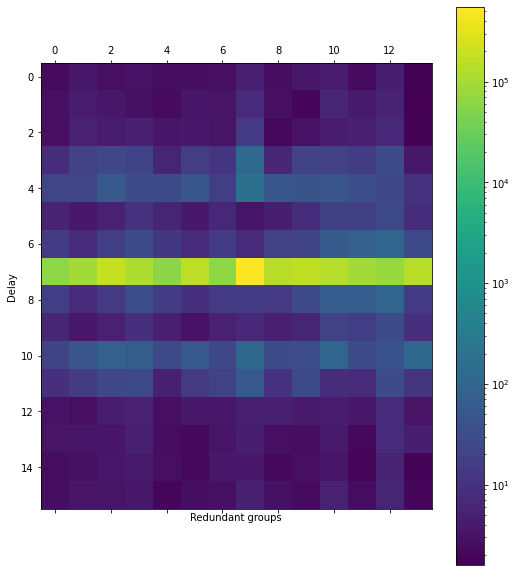

In [21]:
plt.rcParams['figure.figsize'] = [10, 10]
sampler.vis_redcal.plot_power_spectrum()

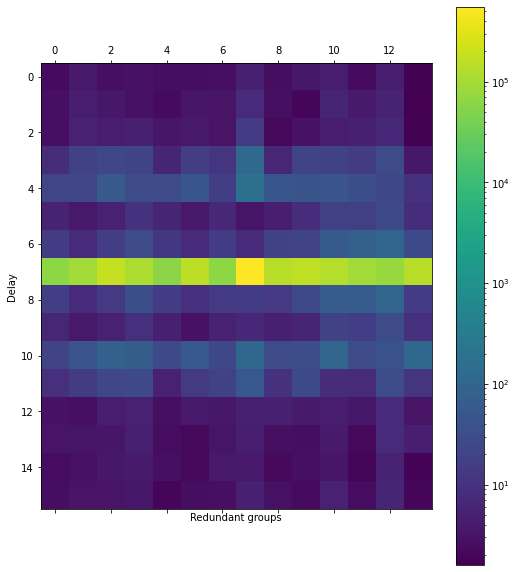

In [22]:
sampler.vis_sampled.plot_power_spectrum()

Plot gains


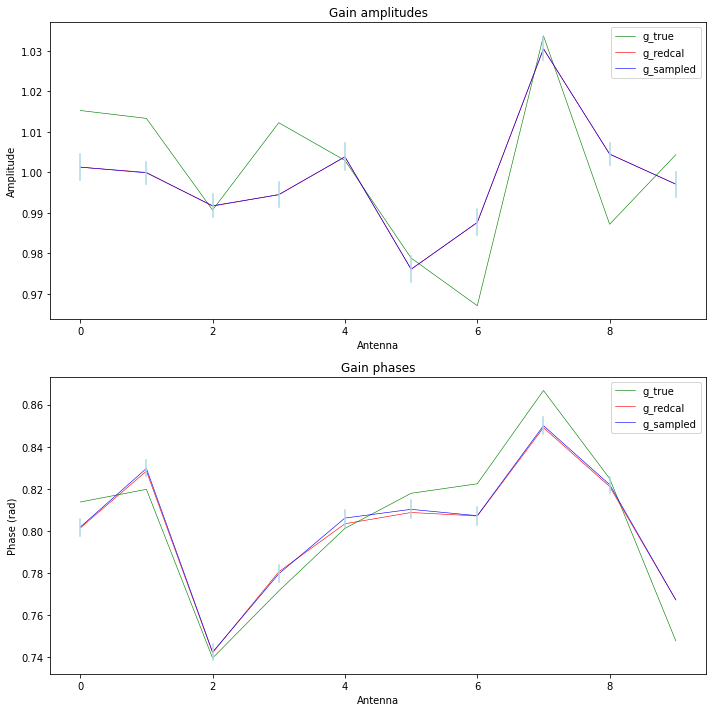

In [23]:
sampler.plot_gains(time=1, freq=1)

Plot calibrated visibilities
----------------------------
Redcal Amp Slope: 0.9997641856196141 Error: 3102.1526753752387
Sampled Amp Slope: 0.9997644715776932 Error: 3102.1334318058634
Redcal Phase Slope: 0.9765656427757827 Error: 1279.052545693221
-3.4557013750076293
Sampled Phase Slope: 0.9765679839364083 Error: 1278.957917895537
CAL rms true diff redcal amp 0.5189385207912067
CAL rms true diff sampled amp 0.5189369224300333
CAL rms true diff redcal phase 0.3358118279009429
CAL rms true diff sampled phase 0.33579913504627956



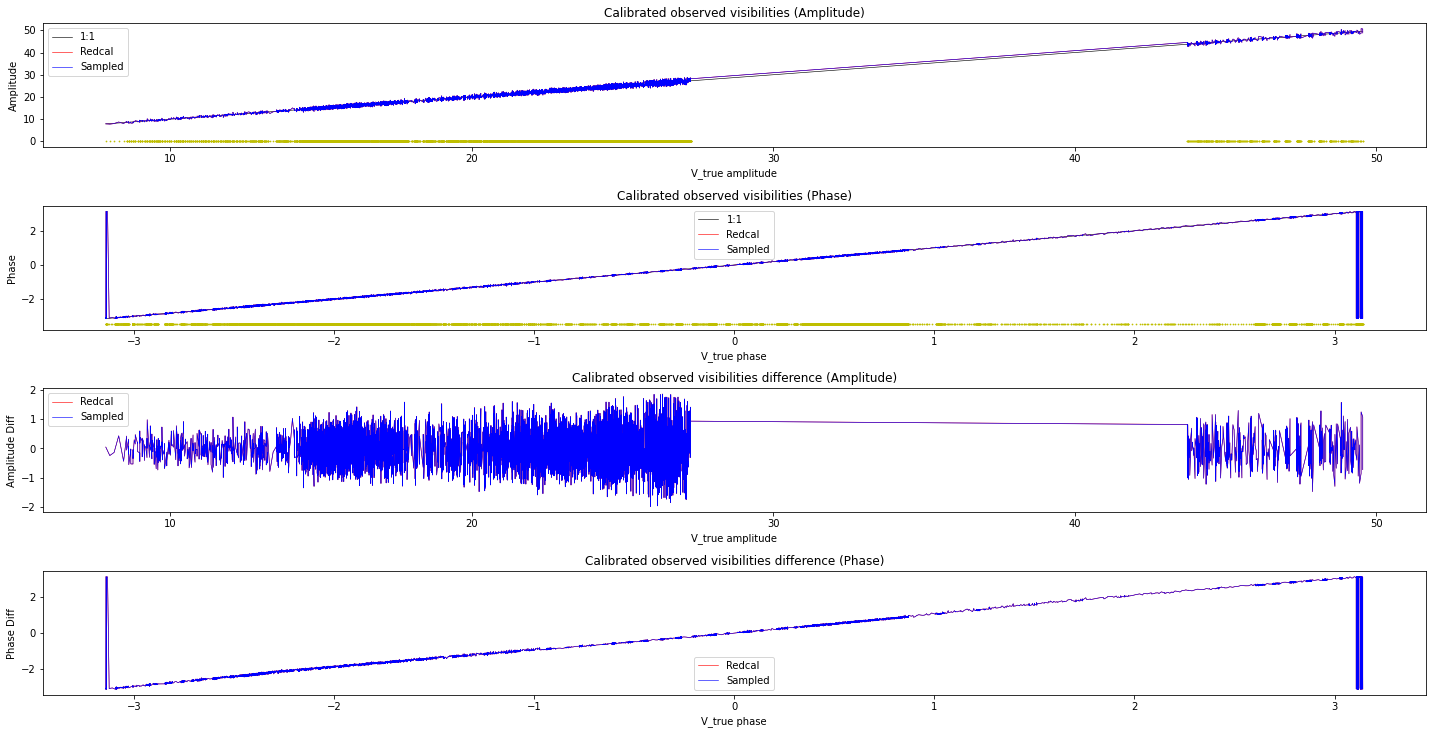

In [24]:
plt.rcParams['figure.figsize'] = [20, 20]
sampler.plot_results1(param="cal", plot_to=name+"_cal_results")

Plot calibrated visibilities
----------------------------
Redcal Amp Slope: 0.9951960322447937 Error: 3049.0705728476464
Sampled Amp Slope: 0.9957061966374022 Error: 2402.494627291349
Redcal Phase Slope: 0.9806314240251636 Error: 1207.9846036168176
-3.4553263664245604
Sampled Phase Slope: 0.9814236686488479 Error: 1169.0221896323515
OBS rms true diff redcal amp 0.5156353225878997
OBS rms true diff sampled amp 0.45772238083073513
OBS rms true diff redcal phase 0.3254499314199707
OBS rms true diff sampled phase 0.320077181622879



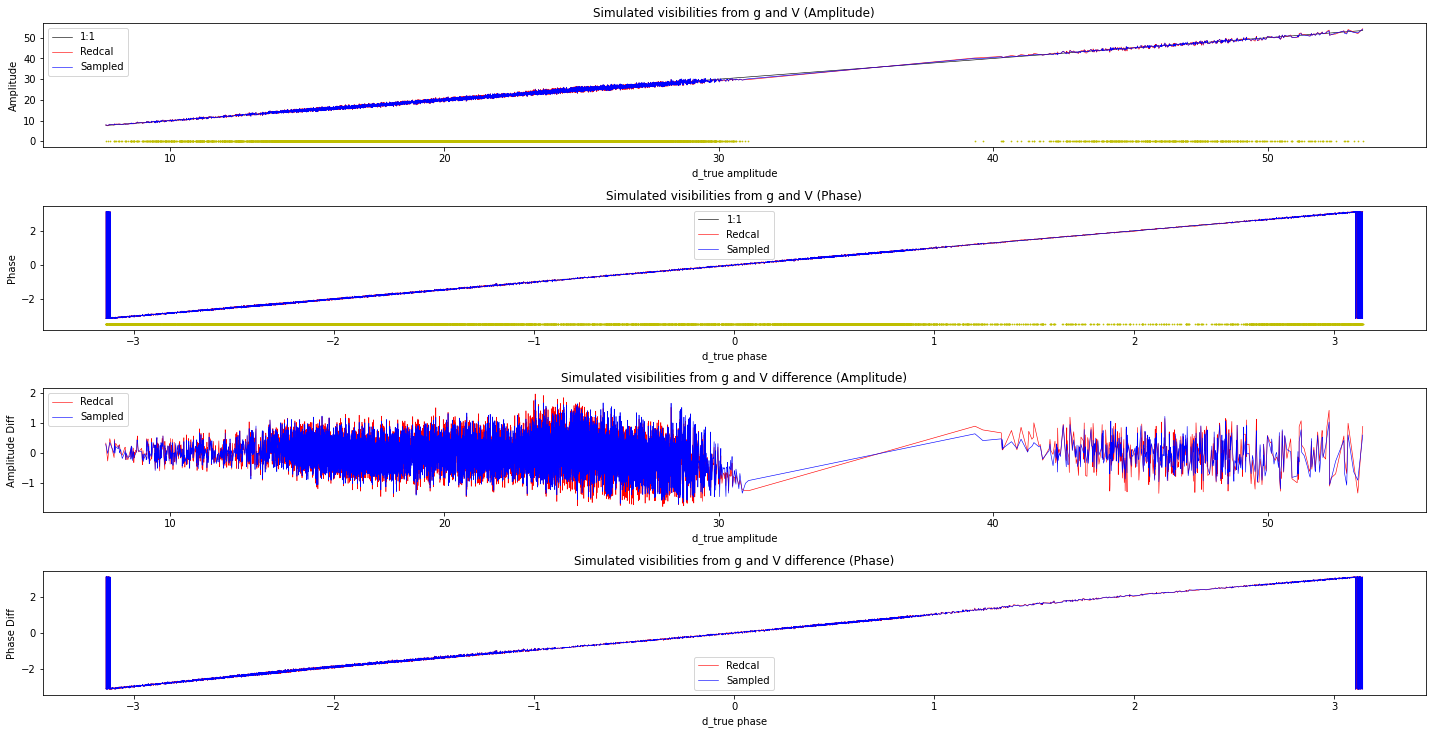

In [25]:
sampler.plot_results1(param="obs", plot_to=name+"_obs_results")

Plot g
------
Redcal Amp Slope: 0.8545747077505123 Error: 0.5216534962486225
Sampled Amp Slope: 0.854577599248186 Error: 0.5216549731049966
Redcal Phase Slope: 0.9200283693903007 Error: 0.5980363547580083
0.591539379954338
Sampled Phase Slope: 0.9200283690005512 Error: 0.6005759233341806
G rms true diff redcal amp 0.015438671751974945
G rms true diff sampled amp 0.015438648611099243
G rms true diff redcal phase 0.015915870784680732
G rms true diff sampled phase 0.015947004249020152



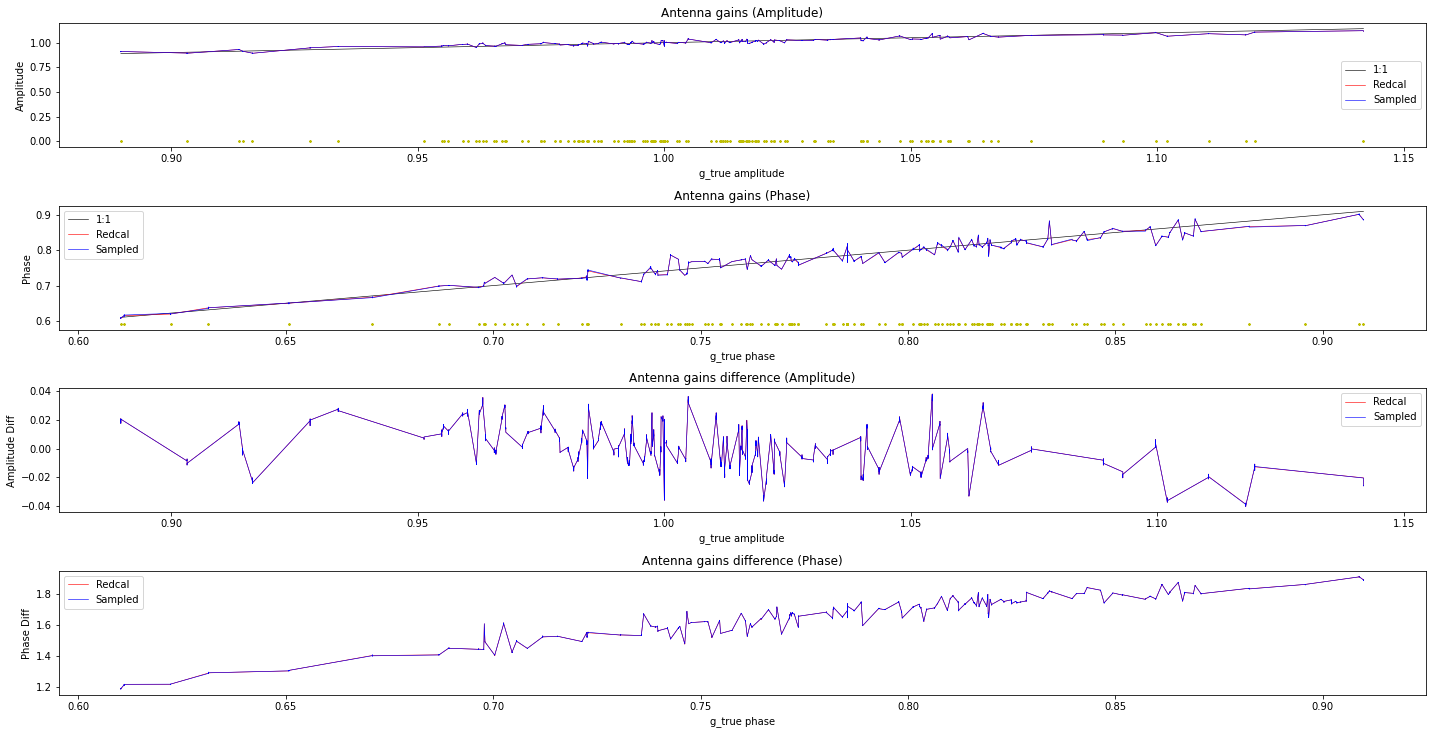

In [26]:
sampler.plot_results1(param="g", plot_to=name+"_all_gains")

Plot V
------
Redcal Amp Slope: 1.000074 Error: 307.11722
Sampled Amp Slope: 0.9996352 Error: 772.38324
Redcal Phase Slope: 0.9962522 Error: 196.95163
-3.4552088260650633
Sampled Phase Slope: 0.9895451 Error: 626.42474
V rms true diff redcal amp 0.16328974
V rms true diff sampled amp 0.2590598
V rms true diff redcal phase 0.1309378
V rms true diff sampled phase 0.23388736



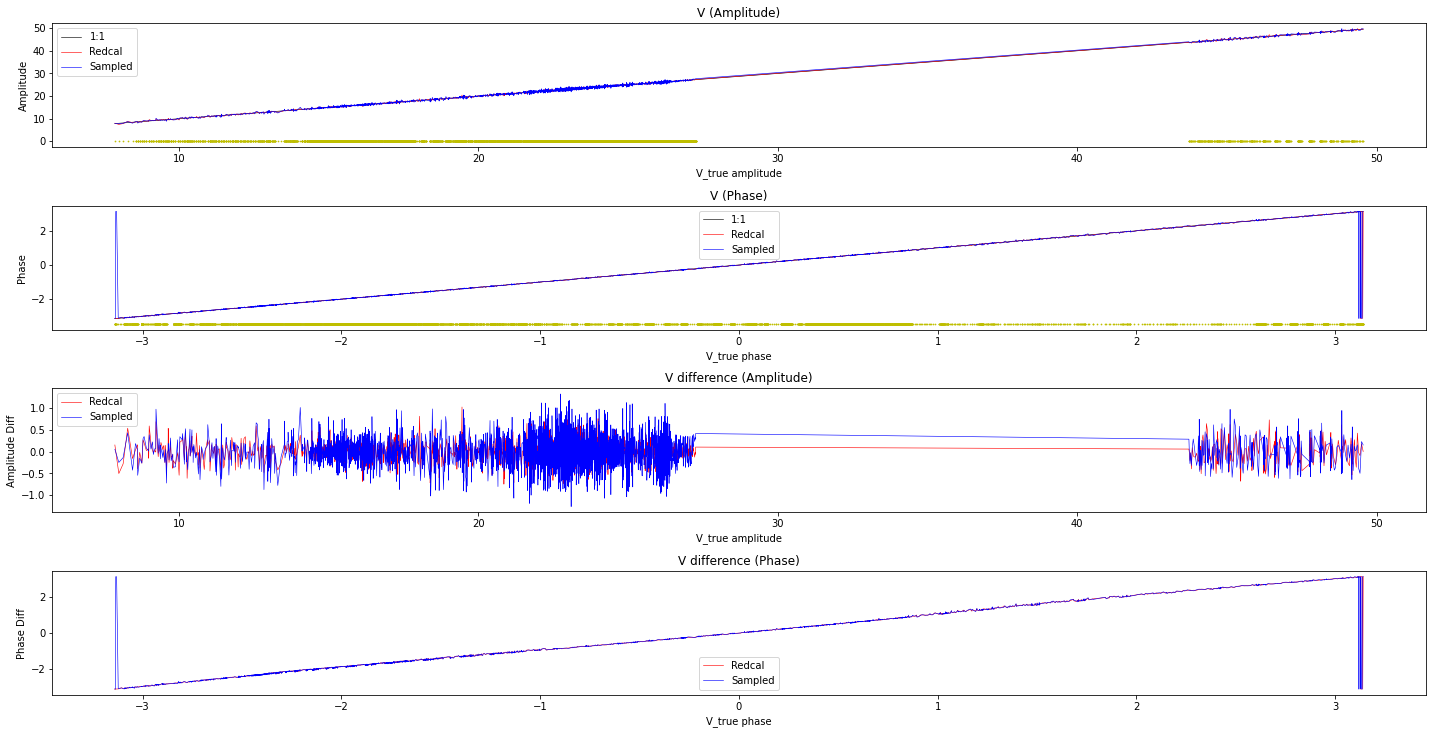

In [27]:
sampler.plot_results1(param="V", plot_to=name+"_all_V")

In [28]:
print("Finished /data/scratch/apw737/catall_nobright/sampled_viscatBC")

Finished /data/scratch/apw737/catall_nobright/sampled_viscatBC
